# 题目

> 给你二叉树的根节点 `root` ，返回它节点值的**前序遍历**。  
> **前序遍历**是按照访问根节点——左子树——右子树的方式遍历这棵树。

# 方法一：递归

> 定义 `preorder(root)` 表示当前遍历到 `root` 节点的答案。按照定义，只要首先将 `root` 节点的值加入答案，然后递归调用 `preorder(root.left)` 来遍历 `root` 节点的左子树，最后递归调用 `preorder(root.right)` 来遍历 `root` 节点的右子树即可，递归终止的条件为碰到空节点。

## 复杂度

- 时间复杂度: $O(n)$ ，其中 $n$ 是二叉树的节点数。

> 每一个节点恰好被遍历一次。

- 空间复杂度: $O(n)$ ，其中 $n$ 是递归中栈帧的开销。

> 平均情况下为 $O(log⁡n)$，最坏情况下树呈现链状，为 $O(n)$ 。

## 代码

### 代码：构建二叉树 

In [1]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

### 代码：前序遍历

In [2]:
def preorderTraversal(root):
    def preorder(root: TreeNode):
        if not root: #基本情况，当前节点为空节点
            return
        res.append(root.val)
        preorder(root.left)
        preorder(root.right)
        
    res = list()
    preorder(root)
    return res

#### 测试一 

In [3]:
root = TreeNode(1)
a = TreeNode(2)
b = TreeNode(3)

In [4]:
root.right = a
a.left = b

In [5]:
preorderTraversal(root)

[1, 2, 3]

#### 测试二

In [6]:
root = TreeNode(1)
a = TreeNode(2)
b = TreeNode(3)

In [7]:
root.left = a
root.right = b

In [8]:
preorderTraversal(root)

[1, 2, 3]

# 方法二：迭代

> 与递归是等价的，区别在于递归的时候隐式地维护了一个栈，而在迭代的时候需要显式地将这个栈模拟出来，其余的实现与细节都相同。

## 复杂度

- 时间复杂度: $O(n)$ ，其中 $n$ 是二叉树的节点数。

> 每一个节点恰好被遍历一次。

- 空间复杂度: $O(n)$ ，其中 $n$ 是迭代中栈的开销。

> 平均情况下为 $O(log⁡n)$，最坏情况下树呈现链状，为 $O(n)$ 。

# 方法三：Morris 遍历

> Morris 遍历的核心思想是利用树的大量空闲指针，实现空间开销的极限缩减。其前序遍历规则总结如下：  
（1）新建临时节点，令该节点为 `root` ；  
（2）如果**当前节点**的左子节点为空，将**当前节点**加入答案，并遍历**当前节点**的右子节点；  
（3）如果**当前节点**的左子节点不为空，在**当前节点**的左子树中找到最右侧的节点，且不能与**当前节点**相同：  
&emsp;&emsp;如果**找到的节点**的右子节点为空，将**找到的节点**的右子节点设置为当前节点。然后将**当前节点**加入答案，并将**找到的节点**的右子节点更新为**当前节点**。**当前节点**更新为**当前节点**的左子节点。  
&emsp;&emsp;如果**找到的节点**的右子节点为当前节点，将它的右子节点重新设为空。**当前节点**更新为**当前节点**的右子节点。  
（4）重复步骤 2 和步骤 3，直到遍历结束。

> Morris其实解决了一个常规循环中循环到叶子节点后难以回到根节点的问题。  
前序遍历是先左后右，那么对任一节点p1来说，其右子树 `p1.right` 所有节点必然在左子树 `p1.left` 之后。代码中第二个 `while` 做的是，在 `p1.left` 里一直往右，直到找不到更右的点，记这一点为 `p2` 。然后把 `p1` 接到 `p2` 的右边。这样既保证了 `p1.right` 在 `p1.left` 所有点之后，又不需要再向上找到父节点 `p1` 。即在正常的往下循环的过程中，不断把右半部分剪下来，接到左半部分的最右下。

## 复杂度

- 时间复杂度: $O(n)$ ，其中 $n$ 是二叉树的节点数。

> 没有左子树的节点只被访问一次，有左子树的节点被访问两次。

- 空间复杂度: $O(1)$ 。

> 只操作已经存在的指针（树的空闲指针），因此只需要常数的额外空间。

## 代码

### 代码：前序遍历

In [9]:
def preorderTraversal(root):
    res = list()
    if not root:
        return res
        
    p1 = root
    while p1: #若p1存在
        p2 = p1.left #p2总是p1的左子节点
        if p2: #若p2存在
            while p2.right and p2.right != p1: #则遍历到最右侧的叶子节点，且p2的右子节点不能等于p1（否则会出现循环遍历）
                p2 = p2.right
            if not p2.right: #若p2的右子节点不存在（说明p2已经到达p1左子树的最右端）
                res.append(p1.val) #此时，将p1的值加入答案
                p2.right = p1 #将p1移到p2的右子节点（相当于将右子树和其父节点剪切到p2的右下方，方便之后遍历）
                p1 = p1.left #由于是前序遍历，因此p1先向左子树遍历
                continue #跳过下面的p1 = p1.right，直接进行下一次while p1循环
            else: #若p2的右子节点存在说明在前面的while循环中，p2的右子节点是p1
                p2.right = None #将剪切过来的右子树删除
        else: #若p1的左子树不存在，直接将p1加入答案
            res.append(p1.val)
        p1 = p1.right #若p1没法往左遍历（没有p1 = p1.left），说明左子树已经遍历到头，此时须向右遍历
        
    return res

## 示例

In [10]:
from IPython.display import Image

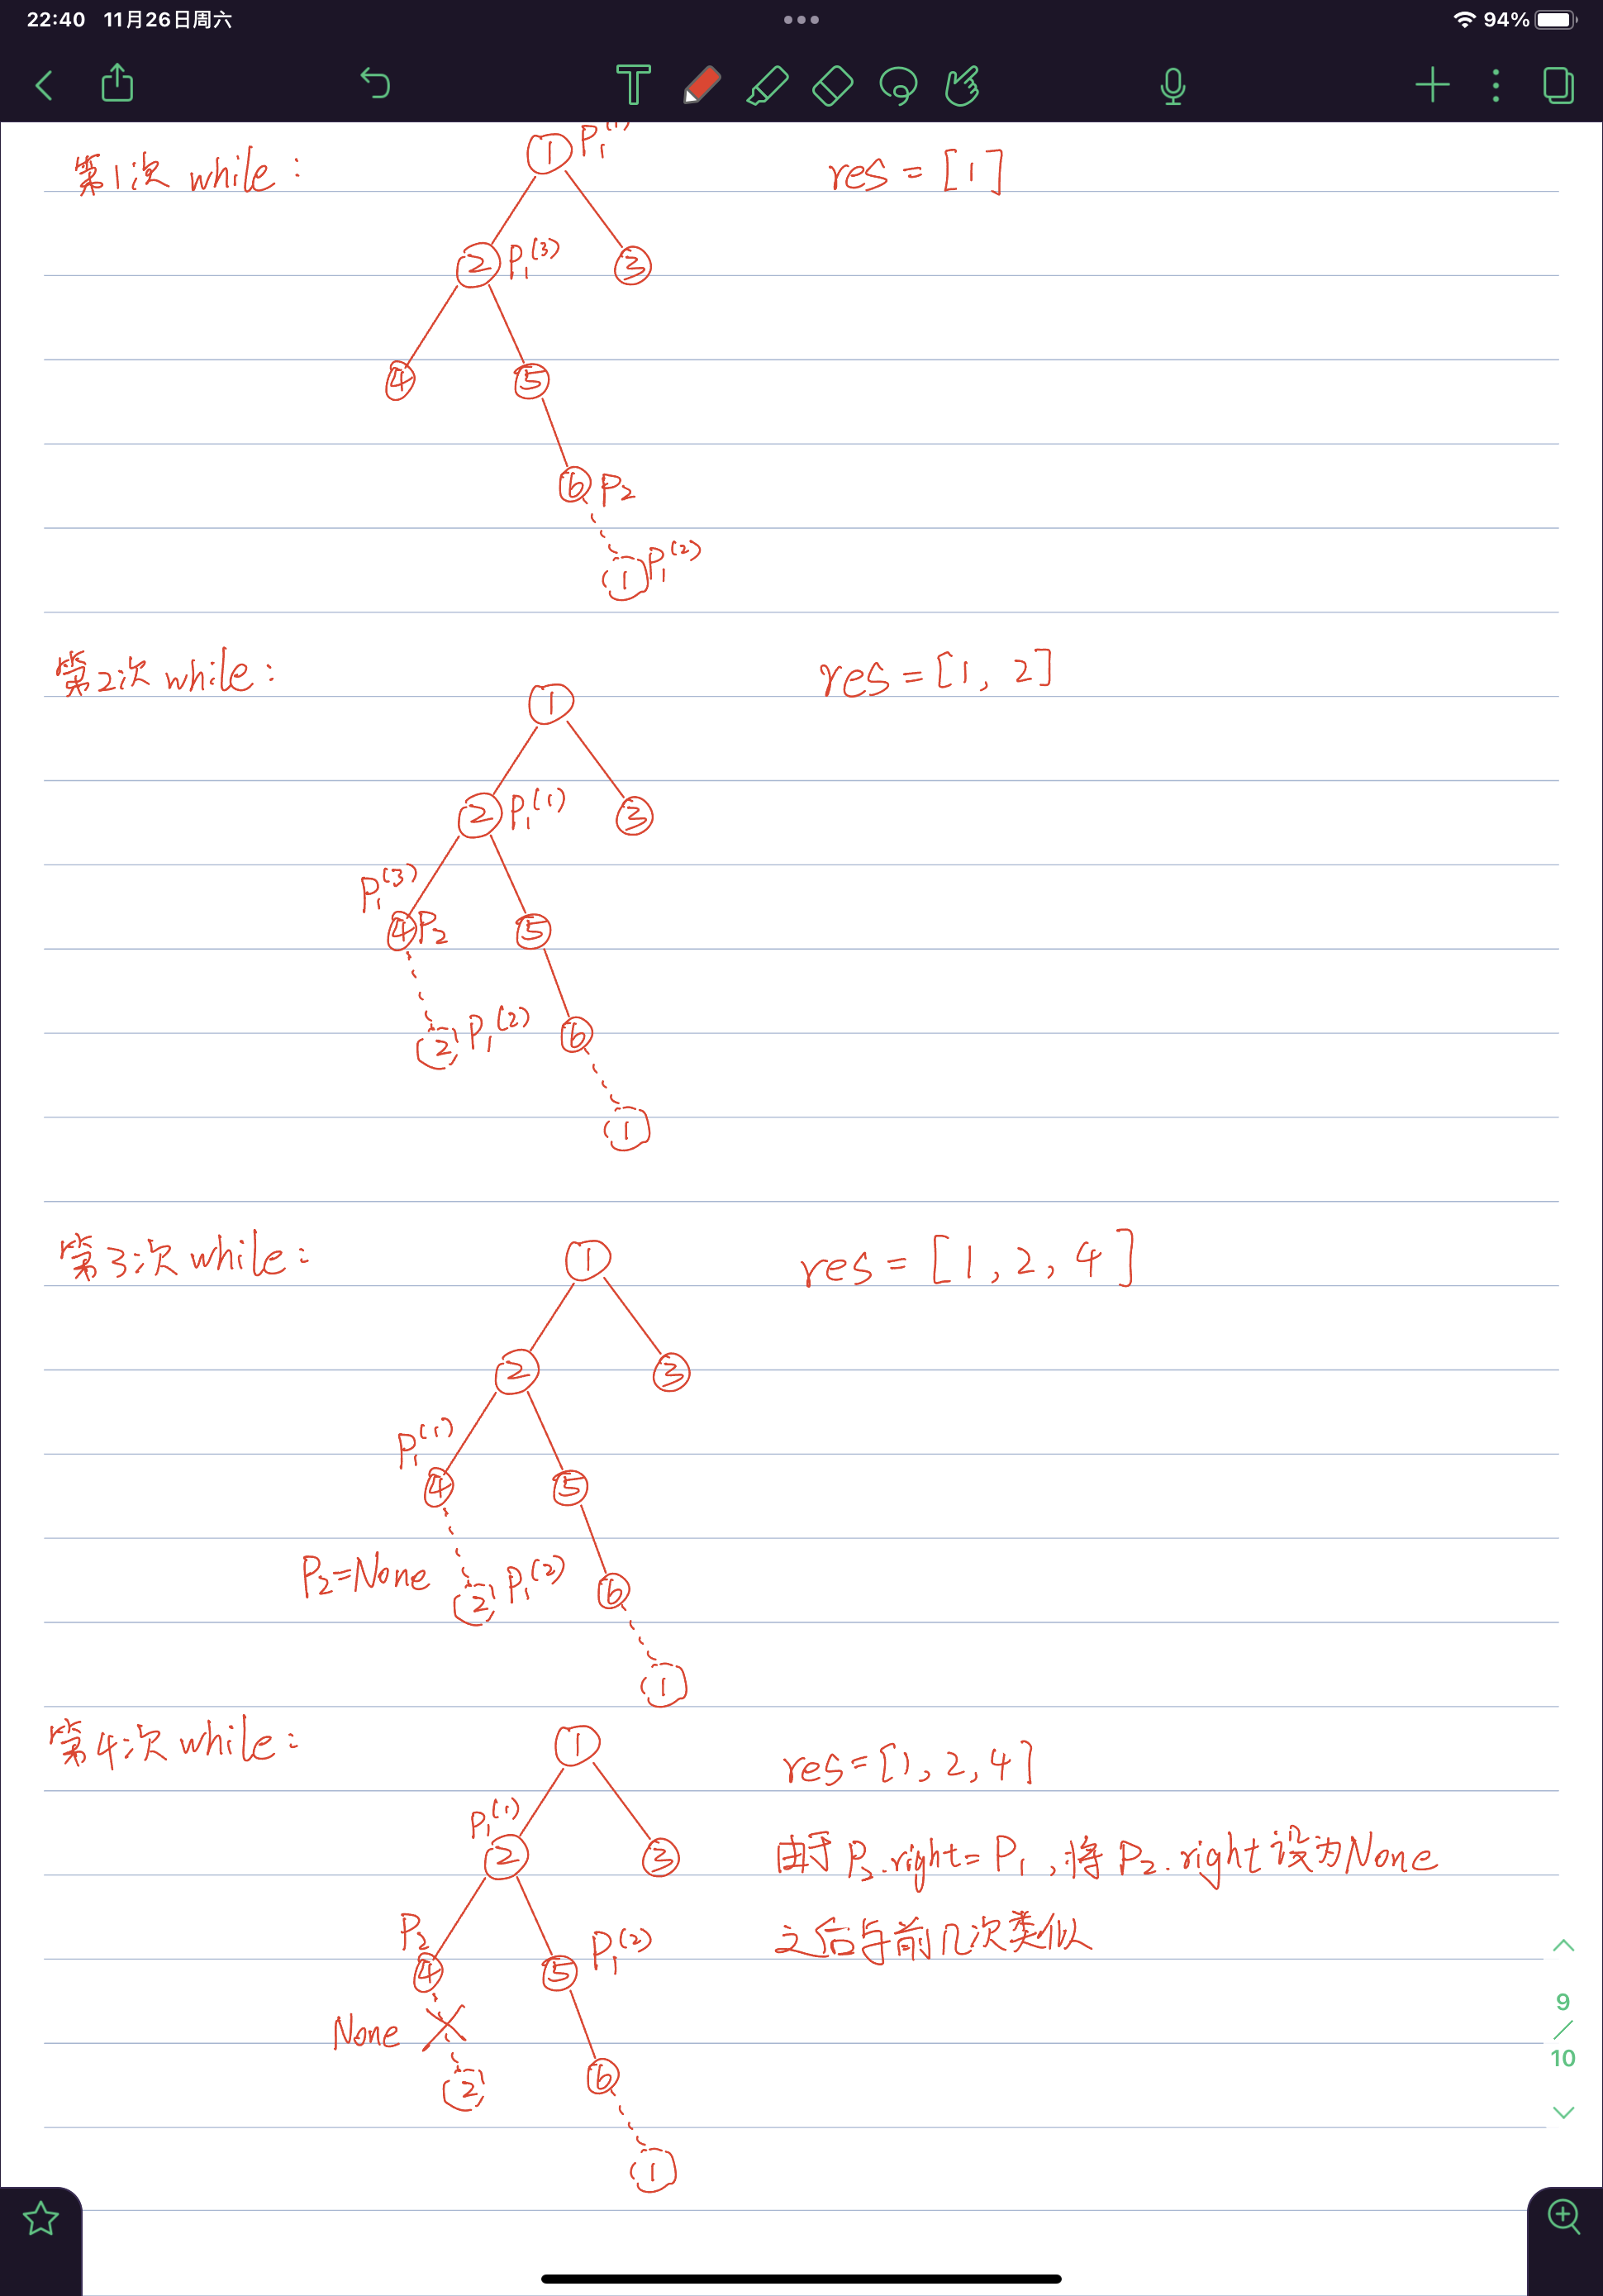

In [11]:
Image(filename = 'C:/Users/y9410/Desktop/学习编程/Leetcode/学习计划/数据结构/1、数据结构入门/图片/Morris遍历.png', width=600, height=360)

#### 测试一 

In [12]:
root = TreeNode(1)
a = TreeNode(2)
b = TreeNode(3)
c = TreeNode(4)
d = TreeNode(5)
e = TreeNode(6)

In [13]:
root.left = a
root.right = b
a.left = c
a.right = d
d.right = e

In [14]:
preorderTraversal(root)

[1, 2, 4, 5, 6, 3]

#### 测试二

In [15]:
root = TreeNode(1)
a = TreeNode(2)
b = TreeNode(3)

In [16]:
root.left = a
root.right = b

In [17]:
preorderTraversal(root)

[1, 2, 3]